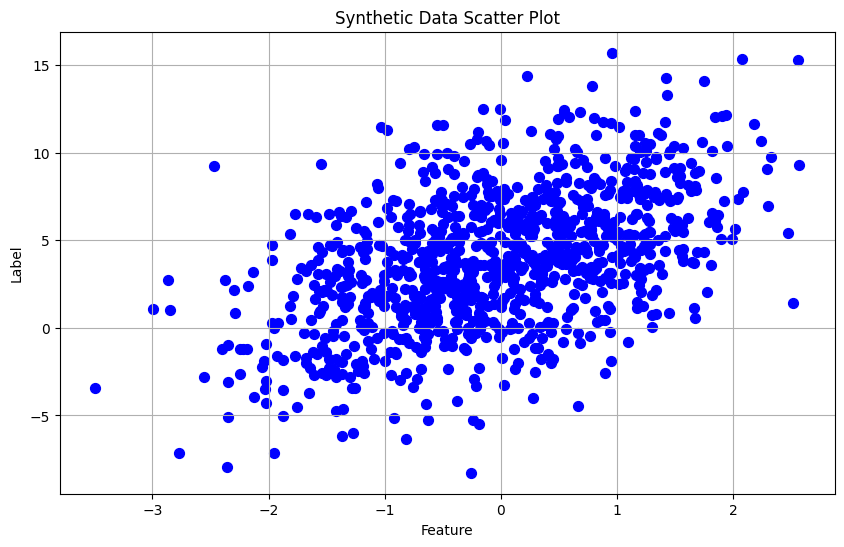

In [1]:
import numpy as np
import numpytorch
from numpytorch.utils import data
import matplotlib.pyplot as plt
import random


def synthetic_data(w, b, num_examples):  # @save
    """Generate y = Xw + b + noise"""
    X = np.random.normal(0, 1, (num_examples, len(w)))
    y = np.dot(X, w) + b
    y += np.random.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))


def plot_scatter(features, labels):
    plt.figure(figsize=(10, 6))
    plt.scatter(features[:, 0], labels, color='b', marker='o', s=50)
    plt.xlabel('Feature')
    plt.ylabel('Label')
    plt.title('Synthetic Data Scatter Plot')
    plt.grid(True)
    plt.show()


true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
plot_scatter(features, labels)

In [2]:
# def data_iter(batch_size, features, labels):
#     num_examples = len(features)
#     indices = np.arange(num_examples)
#     # 这些样本是随机读取的，没有特定的顺序
#     np.random.shuffle(indices)
#     for i in range(0, num_examples, batch_size):
#         batch_indices = indices[i: min(i + batch_size, num_examples)]
#         yield features[batch_indices], labels[batch_indices]
def load_array(data_arrays, batch_size, is_train=True):  # @save
    """构造一个PyTorch数据迭代器"""
    return data.DataLoader(*data_arrays, batch_size, shuffle=is_train)


batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [10]:
# batch_size = 10

# for X, y in data_iter(batch_size, features, labels):
#     print(X, '\n', y)
#     break

In [3]:
from numpytorch import nn
import numpytorch as torch
net = nn.Sequential(nn.Linear(2, 1))
loss = nn.MSELoss()

In [4]:
trainer = torch.optim.SGD(net.layers, lr=0.03, batch_size=batch_size)

In [5]:
epochs = 30
for epoch in range(epochs):
    # Iterate over the batches of the training data
    for batch_X, batch_y in data_iter:
        # Forward pass
        y_pred = net.forward(batch_X)
        l = loss.forward(y_pred=y_pred, y_true=batch_y).mean()

        # Backpropagate the loss
        grad = loss.backward(y_pred=y_pred, y_true=batch_y)
        net.backward(grad)

        # Update the parameters
        trainer.step()

        # Accumulate the running loss
    # Average the running loss

    l = loss.forward(net.forward(batch_X), batch_y)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 19.103134
epoch 2, loss 4.615912
epoch 3, loss 2.277681
epoch 4, loss 0.849903
epoch 5, loss 0.225612
epoch 6, loss 0.081599
epoch 7, loss 0.020686
epoch 8, loss 0.010952
epoch 9, loss 0.002509
epoch 10, loss 0.000958
epoch 11, loss 0.000266
epoch 12, loss 0.000178
epoch 13, loss 0.000103
epoch 14, loss 0.000160
epoch 15, loss 0.000100
epoch 16, loss 0.000123
epoch 17, loss 0.000096
epoch 18, loss 0.000072
epoch 19, loss 0.000107
epoch 20, loss 0.000114
epoch 21, loss 0.000100
epoch 22, loss 0.000086
epoch 23, loss 0.000056
epoch 24, loss 0.000131
epoch 25, loss 0.000074
epoch 26, loss 0.000101
epoch 27, loss 0.000113
epoch 28, loss 0.000132
epoch 29, loss 0.000083
epoch 30, loss 0.000081
